In [ ]:
# Import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pemahaman Dataset

In [ ]:
# load data
house = pd.read_csv('/content/data.csv')
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
house['country'].value_counts()

,count
country,
USA,4600


In [ ]:
house.isna().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
# cek duplikasi data
len(house.drop_duplicates())

4600

In [ ]:
len(house)

4600

In [ ]:
len(house.drop_duplicates()) / len(house)

1.0

Tidak ada duplikat

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Kolom	Deskripsi	Tipe:

- date = Tanggal transaksi rumah dijual
- Price = Harga jual rumah
- bedrooms = Jumlah kamar tidur
- bathrooms = Jumlah kamar mandi
- sqft_living = Luas area tempat tinggal (dalam square feet)
- sqft_lot = Luas keseluruhan tanah
- floors = Jumlah lantai rumah
- waterfront = Apakah rumah di tepi air (lake/sea view)
- view = Kualitas pemandangan (semakin tinggi, semakin bagus)
- condition = Kondisi fisik rumah (1 = buruk, 5 = sangat baik)
- sqft_above = Luas bagian atas tanah (tidak termasuk basement)
- sqft_basement = Luas basement (jika ada)
- yr_built = Tahun rumah dibangun
- yr_renovated = Tahun terakhir direnovasi (0 = belum pernah)
- street = Alamat jalan lengkap
- city = Nama kota / wilayah
- statezip = Kode wilayah (misal: WA 98133)
- country = Negara

TIdak ada missing value

# EDA

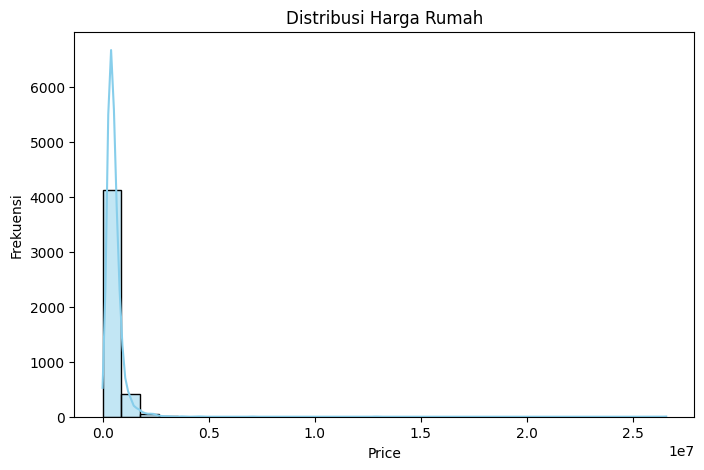

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(house['price'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi Harga Rumah")
plt.xlabel("Price")
plt.ylabel("Frekuensi")
plt.show()

Terdapat outlier jauh sekali, dan kebanyakan data ada di antara 0 dan 0.5

In [ ]:
cat_cols = house.select_dtypes(include='object').columns
num_cols = house.select_dtypes(include=['int64','float64']).columns

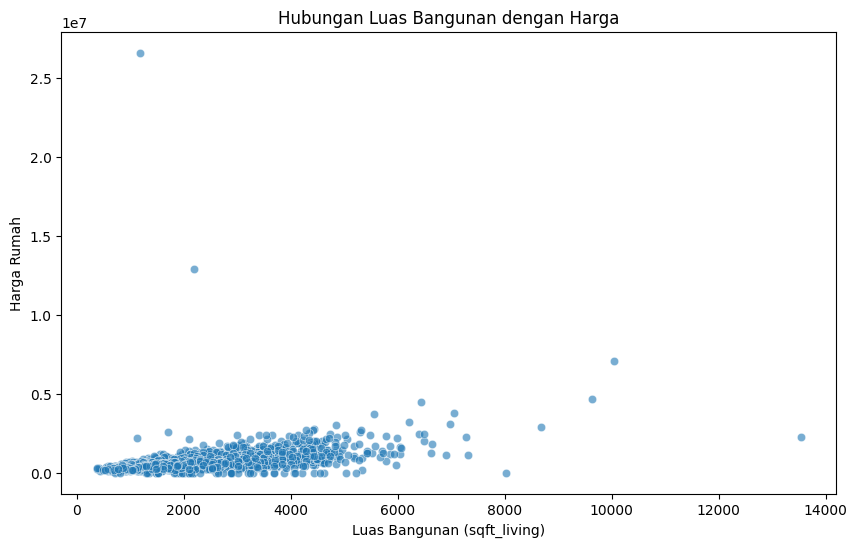

In [ ]:
#Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=house, x='sqft_living', y='price', alpha=0.6)
plt.title('Hubungan Luas Bangunan dengan Harga')
plt.xlabel('Luas Bangunan (sqft_living)')
plt.ylabel('Harga Rumah')
plt.show()

bisa melihat dengan jelas pembagian datanya dengan scatter plot. dimana outlier luas bangunan antara 1000 - 14000 dan harga rumah diantara 1 - 3

In [ ]:
house.sort_values(by='price', ascending=False).head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4350,2014-07-03 00:00:00,26590000.0,3.0,2.00,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA
4346,2014-06-23 00:00:00,12899000.0,3.0,2.50,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,WA 98199,USA
2286,2014-06-11 00:00:00,7062500.0,5.0,4.50,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,WA 98004,USA
2654,2014-06-17 00:00:00,4668000.0,5.0,6.75,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,WA 98040,USA
2761,2014-06-18 00:00:00,4489000.0,4.0,3.00,6430,27517,2.0,0,0,3,6430,0,2001,0,1149-1199 91st Ave NE,Bellevue,WA 98004,USA


/tmp/ipython-input-1258677522.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_city.values, y=avg_city.index, palette='viridis')


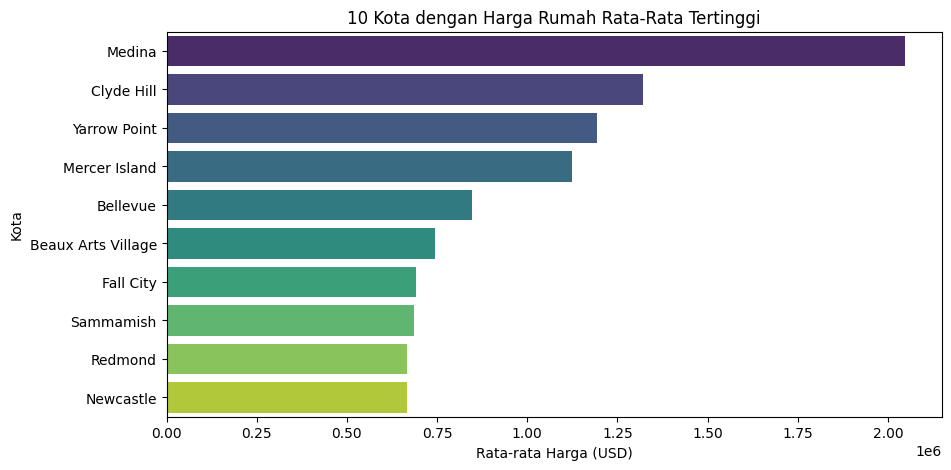

In [ ]:
# barchart untuk melihat harga dengan kota
avg_city = house.groupby('city')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_city.values, y=avg_city.index, palette='viridis')
plt.title('10 Kota dengan Harga Rumah Rata-Rata Tertinggi')
plt.xlabel('Rata-rata Harga (USD)')
plt.ylabel('Kota')
plt.show()

/tmp/ipython-input-2251505976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y='price', data=house, palette='cool')


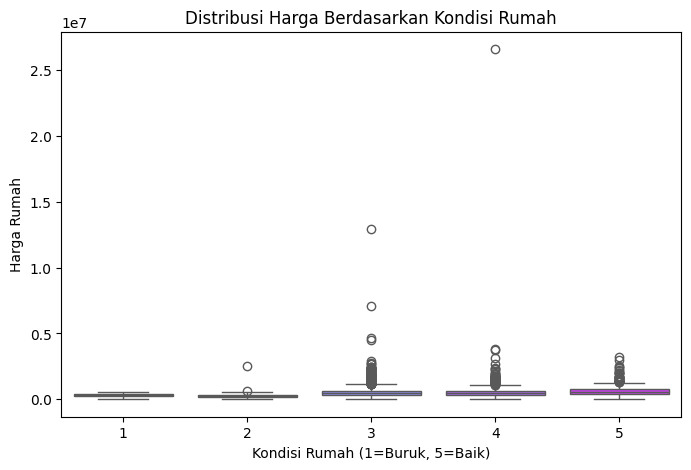

In [ ]:
# untuk melihat distirbusi harga dengan kondisi rumah
plt.figure(figsize=(8,5))
sns.boxplot(x='condition', y='price', data=house, palette='cool')
plt.title('Distribusi Harga Berdasarkan Kondisi Rumah')
plt.xlabel('Kondisi Rumah (1=Buruk, 5=Baik)')
plt.ylabel('Harga Rumah')
plt.show()

/tmp/ipython-input-1730011362.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='city', data=top10_data, order=city_order, palette='coolwarm', edgecolor='black')


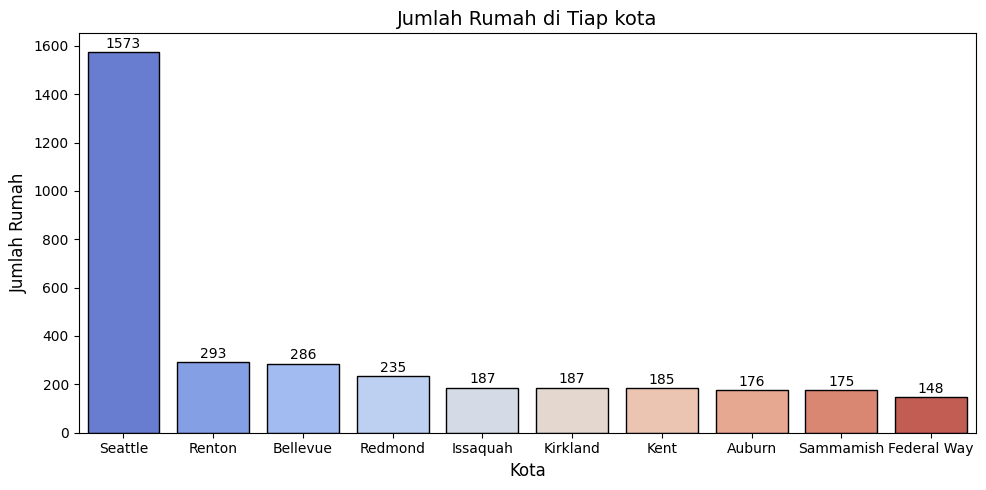

In [ ]:
top10_cities = house['city'].value_counts().head(10).index
top10_data = house[house['city'].isin(top10_cities)]

# Urutkan berdasarkan frekuensi agar grafik lebih rapi
city_order = top10_data['city'].value_counts().index

# Plot
plt.figure(figsize=(10,5))
sns.countplot(x='city', data=top10_data, order=city_order, palette='coolwarm', edgecolor='black')


plt.title("Jumlah Rumah di Tiap kota", fontsize=14)
plt.xlabel("Kota", fontsize=12)
plt.ylabel("Jumlah Rumah", fontsize=12)

# Tambahkan label jumlah di atas tiap batang
for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,   # posisi x (tengah batang)
        p.get_height() + 5,              # posisi y (sedikit di atas batang)
        int(p.get_height()),             # nilai yang ditampilkan
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

In [ ]:
# melihat korelasi dengan target price
corr_target = house.corr(numeric_only=True)['price'].sort_values(ascending=False)

print("📊 Korelasi setiap fitur terhadap Target:\n")
print(corr_target)

📊 Korelasi setiap fitur terhadap Target:

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64


In [ ]:
house['price'].describe().apply(lambda x: format(x, ',.2f'))

,price
count,"4,600.00"
mean,"551,962.99"
std,"563,834.70"
min,0.00
25%,"322,875.00"
50%,"460,943.46"
75%,"654,962.50"
max,"26,590,000.00"


Terdapat nilai 0 dimana kita harus membuang atau mengisi data tersebut

In [ ]:
house.sort_values(by='price', ascending=True).head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4567,2014-07-02 00:00:00,0.0,4.0,2.50,4080,18362,2.0,0,2,4,4080,0,1983,0,2710 95th Ave NE,Clyde Hill,WA 98004,USA
4588,2014-07-08 00:00:00,0.0,4.0,2.25,2890,18226,3.0,1,4,3,2890,0,1984,0,3227-3399 Mountain View Ave N,Renton,WA 98056,USA
4542,2014-06-25 00:00:00,0.0,5.0,3.50,2640,6895,2.0,0,0,3,2640,0,2001,0,34529 SE Jay Ct,Snoqualmie,WA 98065,USA
4374,2014-05-09 00:00:00,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007,0,39612 254th Ave SE,Enumclaw,WA 98022,USA
4358,2014-05-06 00:00:00,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA


In [ ]:
house = house[house['price'] != 0.0]

Disini saya mengecualikan data yang bernilai 0 sehingga tidak masuk ke dataset lagi

In [ ]:
house.reset_index(drop=True, inplace=True)

In [ ]:
house['price'].describe().apply(lambda x: format(x, ',.2f'))

,price
count,"4,551.00"
mean,"557,905.90"
std,"563,929.87"
min,"7,800.00"
25%,"326,264.29"
50%,"465,000.00"
75%,"657,500.00"
max,"26,590,000.00"


In [ ]:
## barchart untuk melihat harga dengan kota
avg_city = house_clean.groupby('city')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_city.values, y=avg_city.index, palette='viridis')

# Tambahkan angka di samping bar
for i, value in enumerate(avg_city.values):
    plt.text(value + 5000, i, f"${value:,.0f}", va='center', fontsize=10, color='black')

plt.title('10 Kota dengan Harga Rumah Rata-Rata Tertinggi')
plt.xlabel('Rata-rata Harga (USD)')
plt.ylabel('Kota')
plt.show()

Jumlah outlier: 240


In [ ]:
house_clean = house[(house['price'] >= lower) & (house['price'] <= upper)]
print("Data setelah dibersihkan:", house_clean.shape)

Data setelah dibersihkan: (4311, 18)


In [ ]:
print("Data sebelum dibersihkan:", house.shape)

Data sebelum dibersihkan: (4551, 18)


### EDA sesudah hapus outlier dan nilai 0

In [ ]:
#ubntuk melihat data statistik
house_clean.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.311000e+03,4311.000000,4311.000000,4311.000000,4.311000e+03,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000
mean,4.874569e+05,3.351659,2.094352,2030.697982,1.459860e+04,1.495129,0.003711,0.173742,3.443749,1747.008583,283.689399,1970.881234,810.582000
std,2.156596e+05,0.881215,0.715171,810.138266,3.614111e+04,0.536898,0.060815,0.644964,0.669194,763.543329,422.527450,29.506086,979.844447
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1430.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1170.000000,0.000000,1951.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.566000e+03,1.500000,0.000000,0.000000,3.000000,1540.000000,0.000000,1976.000000,0.000000
75%,6.150000e+05,4.000000,2.500000,2510.000000,1.069650e+04,2.000000,0.000000,0.000000,4.000000,2190.000000,560.000000,1996.000000,1999.000000
max,1.150000e+06,9.000000,5.750000,7320.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,7320.000000,2300.000000,2014.000000,2014.000000


In [ ]:
# untuk melihat jumlah data di tiap kota
house_clean['city'].value_counts()

,count
city,
Seattle,1461
Renton,291
Bellevue,232
Redmond,227
Issaquah,183
Kent,183
Kirkland,176
Auburn,175
Sammamish,166


In [ ]:
# Untuk melihat data di kota Mapple Valley
Mapple_Valley_data = house_clean[house_clean['city'] == 'Maple Valley']

# urutkan data berdasarkan harga dari yang tertinggi
Maple_sorted = Mapple_Valley_data.sort_values(by='price', ascending=True)

# tampilkan 5 data teratas
Maple_sorted.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4426,2014-06-03 00:00:00,108333.333333,3.0,1.0,1200,9936,1.0,0,0,4,1200,0,1969,0,23414 SE 269th St,Maple Valley,WA 98038,USA
529,2014-05-12 00:00:00,110000.000000,3.0,1.0,1250,53143,1.0,0,0,5,1250,0,1945,0,19693-19799 SE Maple Valley Hwy,Maple Valley,WA 98038,USA
1496,2014-05-28 00:00:00,175000.000000,2.0,1.0,830,2699,1.0,0,0,3,830,0,1996,0,22775 SE 242nd Pl,Maple Valley,WA 98038,USA
744,2014-05-15 00:00:00,215000.000000,3.0,1.0,1160,10384,1.0,0,0,4,1160,0,1969,0,26516 235th Ave SE,Maple Valley,WA 98038,USA
2949,2014-06-20 00:00:00,218000.000000,2.0,2.0,1310,2841,2.0,0,0,3,1310,0,2004,2003,28107 240th Ave SE,Maple Valley,WA 98038,USA


In [ ]:
# Untuk melihat data di kota cylde hill
clyde_hill_data = house_clean[house_clean['city'] == 'Clyde Hill']

# tampilkan beberapa baris pertama
clyde_hill_data.head()



,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
273,2014-05-07 00:00:00,1110000.0,4.0,1.50,2310,13300,1.0,0,0,3,1890,420,1950,2005,9724 NE 14th St,Clyde Hill,WA 98004,USA
474,2014-05-12 00:00:00,927000.0,4.0,2.75,3300,12090,2.0,0,0,3,3300,0,1953,0,9155 NE 21st Pl,Clyde Hill,WA 98004,USA
1264,2014-05-23 00:00:00,945000.0,4.0,2.00,2840,13367,1.0,0,0,3,1420,1420,1952,2008,9723 NE 15th St,Clyde Hill,WA 98004,USA


In [ ]:
# jika ingin tahu berapa jumlah datanya
print(f"\nJumlah rumah di Clyde Hill: {len(clyde_hill_data)}")


Jumlah rumah di Clyde Hill: 3


In [ ]:
# untuk mengetahi data rumah di kota seattle
seattle_data = house_clean[house_clean['city'] == 'Seattle']

# urutkan data berdasarkan harga dari yang tertinggi
seattle_sorted = seattle_data.sort_values(by='price', ascending=True)

# tampilkan 10 data teratas
seattle_sorted.head(10)



,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1283,2014-05-23 00:00:00,90000.000000,2.0,1.0,580,7500,1.0,0,0,3,580,0,1943,2002,6621 S 131st Pl,Seattle,WA 98178,USA
3769,2014-07-01 00:00:00,102500.000000,2.0,1.0,820,4320,1.0,0,0,3,820,0,1937,1999,9852 20th Ave SW,Seattle,WA 98106,USA
2329,2014-06-11 00:00:00,110000.000000,2.0,1.0,800,15000,1.0,0,0,3,800,0,1927,2011,12231 14th Ave S,Seattle,WA 98168,USA
1853,2014-06-04 00:00:00,135000.000000,1.0,1.0,790,13062,1.0,0,0,3,790,0,1942,1999,1641 S 124th St,Seattle,WA 98168,USA
4452,2014-06-10 00:00:00,135333.333333,4.0,1.0,1200,7200,1.5,0,0,3,1200,0,1944,0,6815 S 120th Pl,Seattle,WA 98178,USA
4381,2014-05-16 00:00:00,135333.333333,4.0,1.0,1530,7200,1.5,0,0,3,1400,130,1948,1994,5602 S Avon St,Seattle,WA 98178,USA
928,2014-05-19 00:00:00,137000.000000,3.0,1.0,950,7620,1.0,0,0,3,950,0,1954,2005,9445 8th Ave SW,Seattle,WA 98106,USA
4147,2014-07-08 00:00:00,148000.000000,2.0,1.0,630,4200,1.0,0,0,3,630,0,1930,1997,7760 10th Ave SW,Seattle,WA 98106,USA
2318,2014-06-11 00:00:00,148000.000000,1.0,1.0,620,8261,1.0,0,0,3,620,0,1939,1969,9854 25th Ave SW,Seattle,WA 98106,USA
4379,2014-05-15 00:00:00,148612.500000,3.0,1.0,1040,5000,1.0,0,0,3,1040,0,1959,1989,10050 19th Ave SW,Seattle,WA 98146,USA


In [ ]:
# jika ingin tahu jumlah total data rumah di Seattle
print(f"\nJumlah rumah di Seattle: {len(seattle_sorted)}")


Jumlah rumah di Seattle: 1461


/tmp/ipython-input-3735743509.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_city.values, y=avg_city.index, palette='viridis')


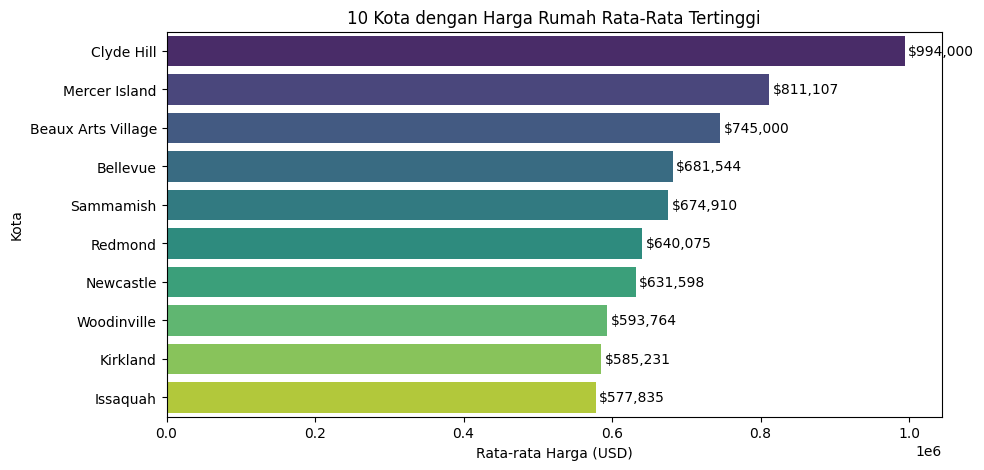

In [ ]:
# barchart untuk melihat harga dengan kota
avg_city = house_clean.groupby('city')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_city.values, y=avg_city.index, palette='viridis')

# Tambahkan angka di samping bar
for i, value in enumerate(avg_city.values):
    plt.text(value + 5000, i, f"${value:,.0f}", va='center', fontsize=10, color='black')

plt.title('10 Kota dengan Harga Rumah Rata-Rata Tertinggi')
plt.xlabel('Rata-rata Harga (USD)')
plt.ylabel('Kota')
plt.show()

Setelah di hapus outlier dan nilai 0, sekarang rata-rata harga rumah tertinggi ada pada kota clyde hill

/tmp/ipython-input-2559347544.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_city.values, y=avg_city.index, palette='viridis')


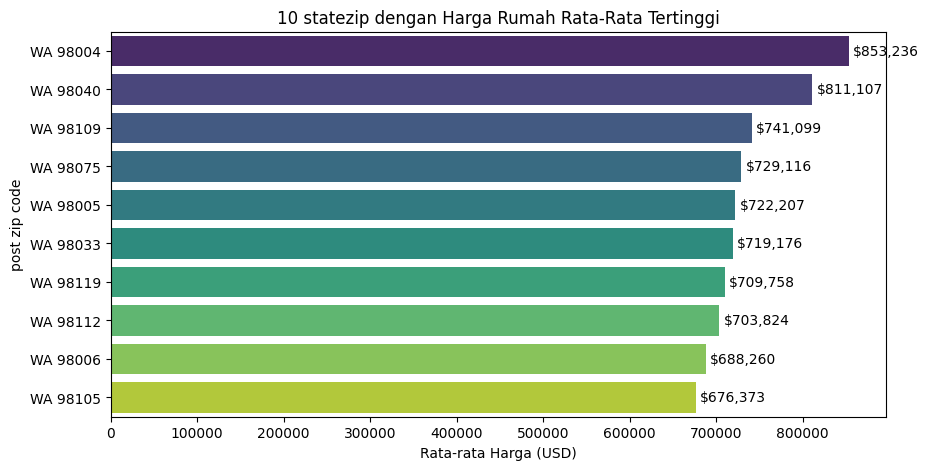

In [ ]:
# barchart untuk melihat harga dengan kota
avg_city = house_clean.groupby('statezip')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_city.values, y=avg_city.index, palette='viridis')

# Tambahkan angka di samping bar
for i, value in enumerate(avg_city.values):
    plt.text(value + 5000, i, f"${value:,.0f}", va='center', fontsize=10, color='black')

plt.title('10 statezip dengan Harga Rumah Rata-Rata Tertinggi')
plt.xlabel('Rata-rata Harga (USD)')
plt.ylabel('post zip code')
plt.show()

Urutan pertama WA 98004 = kota Bellevue

WA 98040 = seatle

urutan ketiga juga seatle

harga rumah rata-rata tertinggi pada statezip adalah statezip_wa 98004

/tmp/ipython-input-3836902217.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='city', data=top10_data, order=city_order, palette='coolwarm', edgecolor='black')


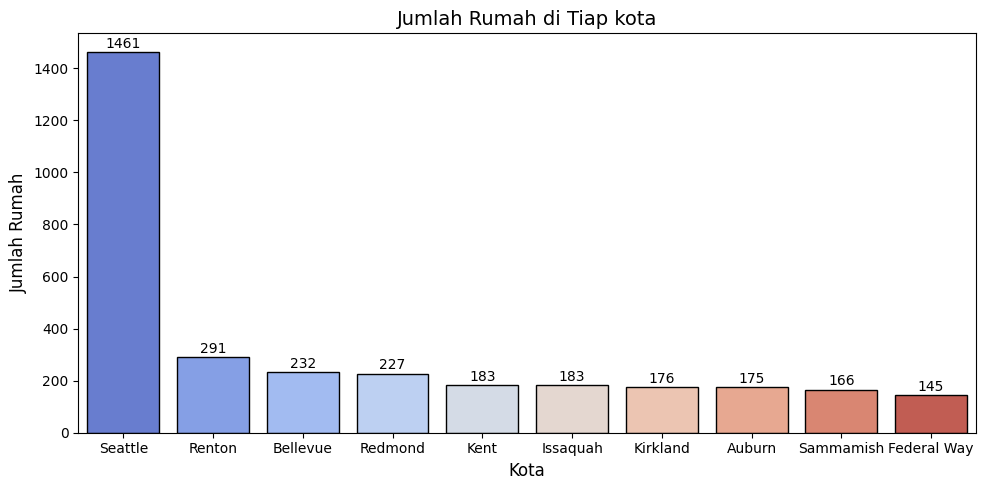

In [ ]:
top10_cities = house_clean['city'].value_counts().head(10).index
top10_data = house_clean[house_clean['city'].isin(top10_cities)]

# Urutkan berdasarkan frekuensi agar grafik lebih rapi
city_order = top10_data['city'].value_counts().index

# Plot
plt.figure(figsize=(10,5))
sns.countplot(x='city', data=top10_data, order=city_order, palette='coolwarm', edgecolor='black')


plt.title("Jumlah Rumah di Tiap kota", fontsize=14)
plt.xlabel("Kota", fontsize=12)
plt.ylabel("Jumlah Rumah", fontsize=12)

# Tambahkan label jumlah di atas tiap batang
for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,   # posisi x (tengah batang)
        p.get_height() + 5,              # posisi y (sedikit di atas batang)
        int(p.get_height()),             # nilai yang ditampilkan
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

/tmp/ipython-input-1459296147.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y='price', data=house_clean, palette='cool')


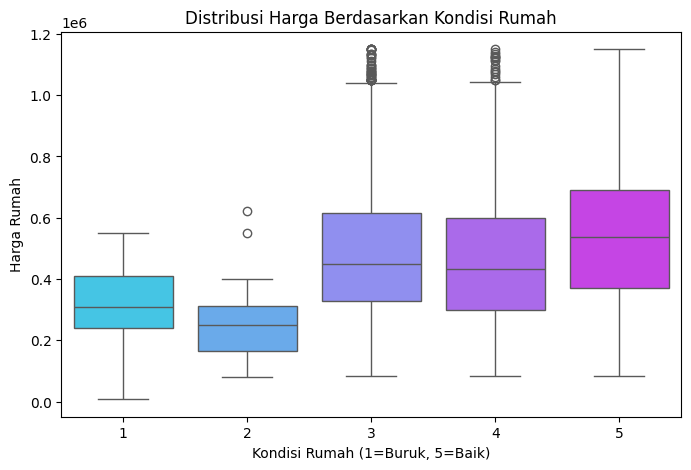

In [ ]:
# boxplot berdasarkan kondisi rumah
plt.figure(figsize=(8,5))
sns.boxplot(x='condition', y='price', data=house_clean, palette='cool')
plt.title('Distribusi Harga Berdasarkan Kondisi Rumah')
plt.xlabel('Kondisi Rumah (1=Buruk, 5=Baik)')
plt.ylabel('Harga Rumah')
plt.show()

Data boxplot sudah terlihat, tidak ada outlier yang sangat jauh

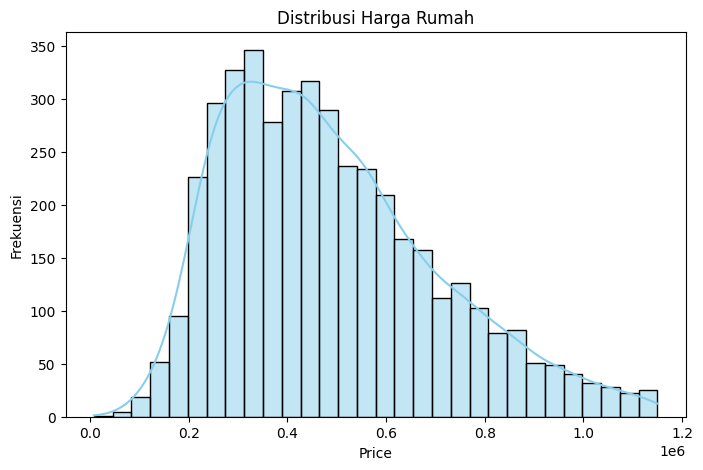

In [ ]:
# hisplot
plt.figure(figsize=(8,5))
sns.histplot(house_clean['price'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi Harga Rumah")
plt.xlabel("Price")
plt.ylabel("Frekuensi")
plt.show()

Data sudah terlihat normal dengan tidak adanya outlier yang berjauhan

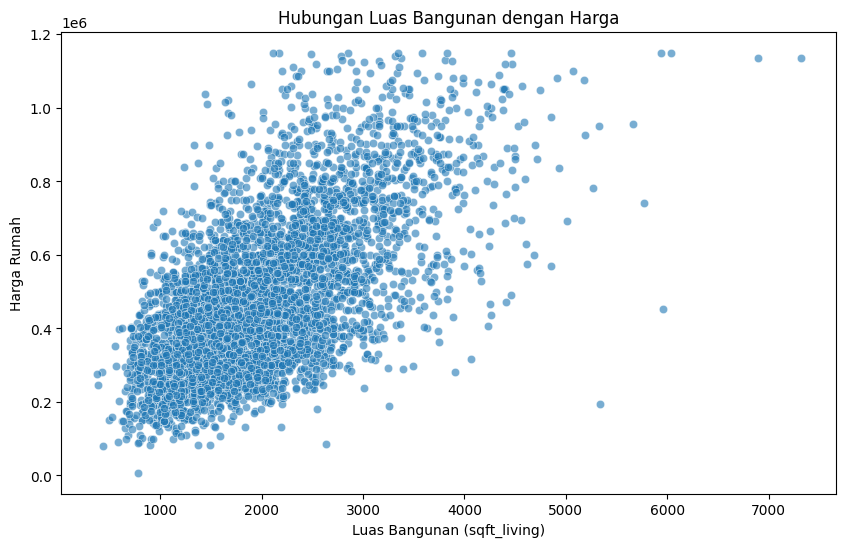

In [ ]:
# Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(data=house_clean, x='sqft_living', y='price', alpha=0.6)
plt.title('Hubungan Luas Bangunan dengan Harga')
plt.xlabel('Luas Bangunan (sqft_living)')
plt.ylabel('Harga Rumah')
plt.show()

distribusi data sudah terlihat normal

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X = house_clean.drop(columns=['price'])
y = house_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=21)

In [ ]:
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=21)

In [ ]:
print("Train:", X_train.shape)
#print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (3017, 17)
Test: (1294, 17)


In [ ]:
#ubah dari numpy ke dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# untuk ambil kolom numerik
num_train = X_train.select_dtypes(include=['int64', 'float64'])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(num_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,vif_score
1,bedrooms,1.712127
2,bathrooms,3.052823
3,sqft_living,inf
4,sqft_lot,1.064437
5,floors,1.901109
6,waterfront,1.104256
7,view,1.198303
8,condition,1.402085
9,sqft_above,inf
10,sqft_basement,inf


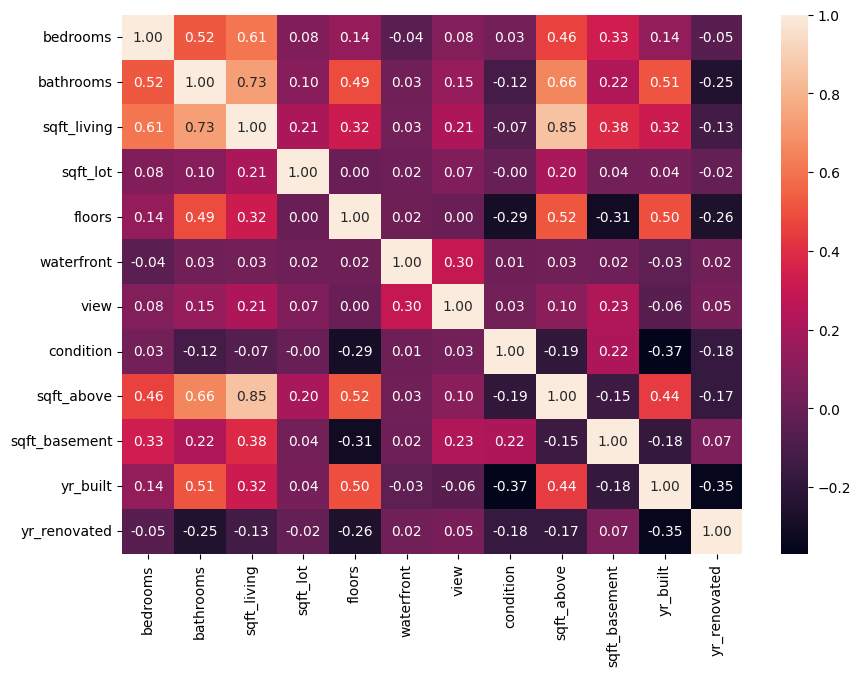

In [ ]:
# heatmap correlation
import matplotlib.pyplot as plt
import seaborn as sns
churn_train = pd.concat([X_train, y_train], axis=1)
corr = num_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [ ]:
# seleksi fitur, tidak menggunakan kolom rad, indus, dan nox
# 'sqft_above'
num_train = num_train.drop(columns=['sqft_living'])
#X_val = X_val.drop(columns=['sqft_above', 'sqft_living'])
X_test = X_test.drop(columns=['sqft_living'])

In [ ]:
X = add_constant(num_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,bedrooms,1.712127
2,bathrooms,3.052823
3,sqft_lot,1.064437
4,floors,1.901109
5,waterfront,1.104256
6,view,1.198303
7,condition,1.402085
8,sqft_above,2.572249
9,sqft_basement,1.841839
10,yr_built,1.956143


## hanya untuk melihat corelasi dengan target price

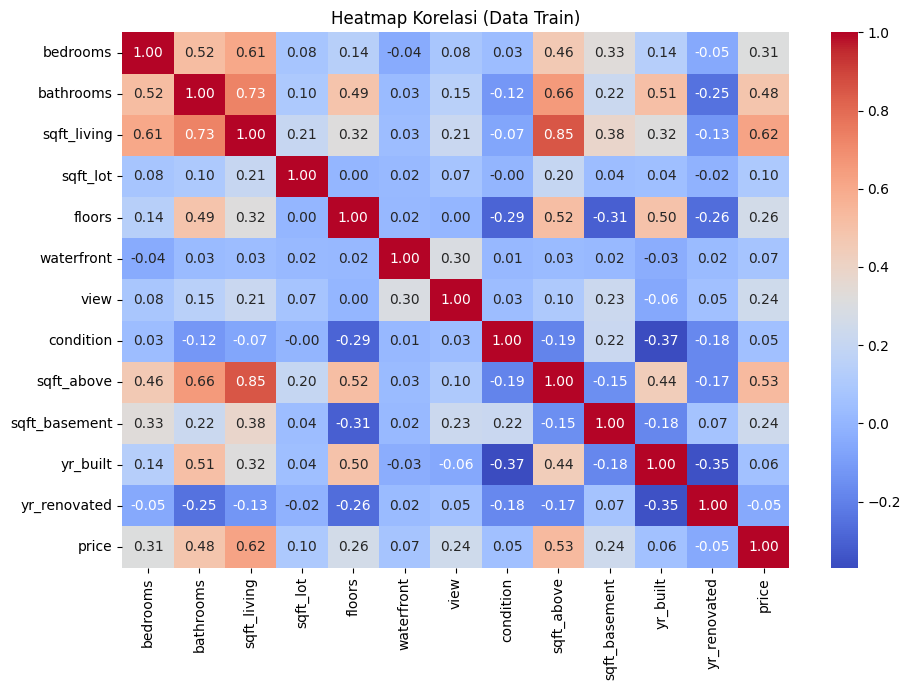

In [ ]:
# Gabungkan fitur dan target
train_df = pd.concat([X_train, y_train], axis=1)

# Ambil hanya kolom numerik
num_train = train_df.select_dtypes(include=['number'])

# Hitung korelasi
corr_train = num_train.corr()

# Visualisasi heatmap
plt.figure(figsize=(18, 7))

plt.subplot(1, 2, 1)
sns.heatmap(corr_train, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi (Data Train)")

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
X = add_constant(num_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,vif_score
1,bedrooms,1.748363
2,bathrooms,3.098483
3,sqft_living,inf
4,sqft_lot,1.066035
5,floors,1.937948
6,waterfront,1.104379
7,view,1.210886
8,condition,1.412632
9,sqft_above,inf
10,sqft_basement,inf


In [ ]:
# seleksi fitur, tidak menggunakan kolom rad, indus, dan nox
# 'sqft_above'
num_train = num_train.drop(columns=['sqft_living'])
#X_val = X_val.drop(columns=['sqft_above', 'sqft_living'])
X_test = X_test.drop(columns=['sqft_living'])

In [ ]:
X = add_constant(num_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,bedrooms,1.748363
2,bathrooms,3.098483
3,sqft_lot,1.066035
4,floors,1.937948
5,waterfront,1.104379
6,view,1.210886
7,condition,1.412632
8,sqft_above,3.222778
9,sqft_basement,2.017274
10,yr_built,2.059329


note : kalau dijalankan heatmap untuk melihat korelasi price, maka harus dijalankan ulang tanpa menjalankan heatmap korelasi dengan price. karea datanya sudah di concat

# Data Preprocessing

In [ ]:
cat_cols = X_train.select_dtypes(include='object').columns
num_cols = num_train.select_dtypes(include=['int64','float64']).columns

X_train_cat = X_train[cat_cols]
X_train_num = X_train[num_cols]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat_enc = encoder.fit_transform(X_train_cat)

# pakai one hot encoding
X_train_cat_enc = pd.DataFrame(
    X_train_cat_enc,
    columns=encoder.get_feature_names_out(cat_cols),
    index=X_train.index
)

In [ ]:
# untuk menggabungkan data numerical dan categorical train tadi
X_train_final = pd.concat([X_train_num, X_train_cat_enc], axis=1)

In [ ]:
X_train_final.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,...,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354,country_USA
977,3.0,1.50,1050,2.0,0,0,3,1570,0,1915,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2044,3.0,1.00,8100,1.0,0,0,4,920,920,1953,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
900,3.0,2.25,1445,2.0,0,0,3,980,470,2005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
434,3.0,1.75,11340,1.0,0,1,4,1300,450,1987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1764,4.0,2.50,5175,2.0,0,0,3,1830,0,2003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# untuk one hot encoding di data test
X_test_cat = X_test[cat_cols]
X_test_num = X_test[num_cols]

X_test_cat_enc = encoder.transform(X_test_cat)
X_test_cat_enc = pd.DataFrame(
    X_test_cat_enc,
    columns=encoder.get_feature_names_out(cat_cols),
    index=X_test.index
)

X_test_final = pd.concat([X_test_num, X_test_cat_enc], axis=1)

In [ ]:
# untuk one hot encoding di data validation
# kode ini tidak perlu dijalankan, karena saya tidak pakai validation
X_val_cat = X_test[cat_cols]
X_val_num = X_test[num_cols]

X_val_cat_enc = encoder.transform(X_test_cat)
X_val_cat_enc = pd.DataFrame(
    X_val_cat_enc,
    columns=encoder.get_feature_names_out(cat_cols),
    index=X_test.index
)

X_test_final = pd.concat([X_val_num, X_val_cat_enc], axis=1)

In [ ]:
# min-max scaler based on training data
# agar datanya di normalisasikan
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

minmax_scaler = scaler.fit(X_train_final)
X_train_scaled = minmax_scaler.transform(X_train_final)
X_test_scaled = minmax_scaler.transform(X_test_final)

# Modeling

## Randomforest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#data test
model_RF = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=10)
model_RF.fit(X_train_scaled, y_train)

y_pred_RF = model_RF.predict(X_test_scaled)

r2_rf = r2_score(y_test, y_pred_RF)
mae_rf = mean_absolute_error(y_test, y_pred_RF)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_RF))

print("\n✅ Evaluasi Model Random Forest")
print(f"R² Score : {r2_rf:.4f}")
print(f"MAE      : {mae_rf:,.2f}")
print(f"RMSE     : {rmse_rf:,.2f}")


✅ Evaluasi Model Random Forest
R² Score : 0.6859
MAE      : 90,286.16
RMSE     : 119,891.95


In [ ]:
# data train
model_RF = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=10)
model_RF.fit(X_train_scaled, y_train)

y_pred_RF = model_RF.predict(X_train_scaled)

r2_rf = r2_score(y_train, y_pred_RF)
mae_rf = mean_absolute_error(y_train, y_pred_RF)
rmse_rf = np.sqrt(mean_squared_error(y_train, y_pred_RF))

print("\n✅ Evaluasi Model Random Forest")
print(f"R² Score : {r2_rf:.4f}")
print(f"MAE      : {mae_rf:,.2f}")
print(f"RMSE     : {rmse_rf:,.2f}")


✅ Evaluasi Model Random Forest
R² Score : 0.8392
MAE      : 68,533.35
RMSE     : 86,753.94


## Linear regresion

In [ ]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# data test
y_pred_LR = model_LR.predict(X_test_scaled)

r2_lr = r2_score(y_test, y_pred_LR)
mae_lr = mean_absolute_error(y_test, y_pred_LR)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_LR))

print("\n✅ Evaluasi Model Linear Regression")
print(f"R² Score : {r2_lr:.4f}")
print(f"MAE      : {mae_lr:,.2f}")
print(f"RMSE     : {rmse_lr:,.2f}")


✅ Evaluasi Model Linear Regression
R² Score : 0.4233
MAE      : 121,560.55
RMSE     : 162,442.04


In [ ]:
# data train
y_pred_LR = model_LR.predict(X_train_scaled)

r2_lr = r2_score(y_train, y_pred_LR)
mae_lr = mean_absolute_error(y_train, y_pred_LR)
rmse_lr = np.sqrt(mean_squared_error(y_train, y_pred_LR))

print("\n✅ Evaluasi Model Linear Regression")
print(f"R² Score : {r2_lr:.4f}")
print(f"MAE      : {mae_lr:,.2f}")
print(f"RMSE     : {rmse_lr:,.2f}")


✅ Evaluasi Model Linear Regression
R² Score : 1.0000
MAE      : 0.00
RMSE     : 0.00


In [ ]:
#untuk melihat coef model Linear Regression
pd.DataFrame(zip(X.columns, model_LR.coef_))

,0,1
0,const,408208.703971
1,bedrooms,-57694.686212
2,bathrooms,328650.365860
3,sqft_lot,-77322.496995
4,floors,36501.216843
5,waterfront,-210359.399544
6,view,-70146.025781
7,condition,373665.991110
8,sqft_above,-21738.074699
9,sqft_basement,88760.978990


In [ ]:
model_LR.coef_

array([408208.70397057, -57694.68621156, 328650.36586034, ...,
       -42944.497098  , -65344.95684384,      0.        ])

Korelasi Fitur Numerik terhadap Harga Rumah:
price            1.000000
sqft_living      0.631773
sqft_above       0.543391
bathrooms        0.476807
bedrooms         0.309080
floors           0.276608
sqft_basement    0.229384
view             0.225239
sqft_lot         0.098622
waterfront       0.072393
yr_built         0.062516
condition        0.047677
yr_renovated    -0.070787
Name: price, dtype: float64


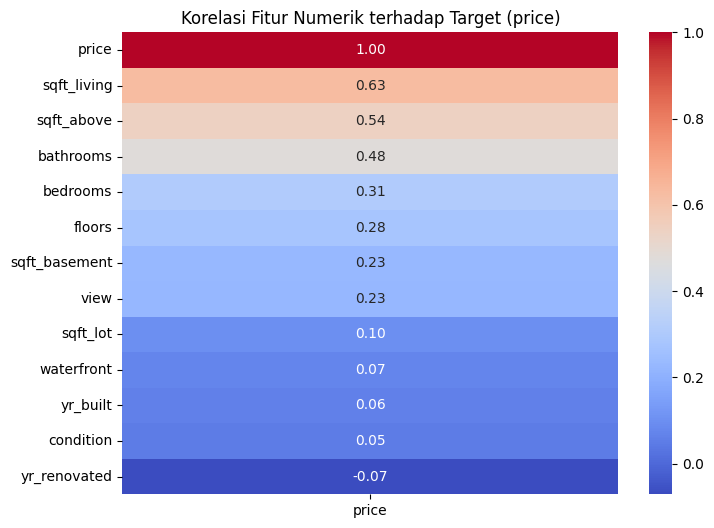

In [ ]:
numeric_data = house_clean.select_dtypes(include=['int64', 'float64'])

# hitung korelasi terhadap harga
corr_with_target = numeric_data.corr()['price'].sort_values(ascending=False)

# tampilkan hasil korelasi
print("Korelasi Fitur Numerik terhadap Harga Rumah:")
print(corr_with_target)

# visualisasi heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr()[['price']].sort_values(by='price', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Fitur Numerik terhadap Target (price)")
plt.show()


Tidak ada korelasi yang tinggi, sehingga bukan data leakage.

## xgboost regressor

In [ ]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model_xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# data test
y_pred_XG = model_xgb.predict(X_test_scaled)

r2_lr = r2_score(y_test, y_pred_XG)
mae_lr = mean_absolute_error(y_test, y_pred_XG)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_XG))

print("\n✅ Evaluasi Model XGboost Regressor")
print(f"R² Score : {r2_lr:.4f}")
print(f"MAE      : {mae_lr:,.2f}")
print(f"RMSE     : {rmse_lr:,.2f}")


✅ Evaluasi Model XGboost Regressor
R² Score : 0.7996
MAE      : 66,794.60
RMSE     : 95,761.10


In [ ]:
# data train
y_pred_XG = model_xgb.predict(X_train_scaled)

r2_lr = r2_score(y_train, y_pred_XG)
mae_lr = mean_absolute_error(y_train, y_pred_XG)
rmse_lr = np.sqrt(mean_squared_error(y_train, y_pred_XG))

print("\n✅ Evaluasi Model XGboost Regressor")
print(f"R² Score : {r2_lr:.4f}")
print(f"MAE      : {mae_lr:,.2f}")
print(f"RMSE     : {rmse_lr:,.2f}")


✅ Evaluasi Model XGboost Regressor
R² Score : 0.9752
MAE      : 26,640.20
RMSE     : 34,062.54


Best model xgboost regressor
Pada model ini, didapatkan nilai :
- R2 score = 0.7996 bisa dibilang model berhasil atau mampu menangkap 79.96% atau 80% variansi dari fitur harga rumah. artinya model bisa diaktakan baik digunakan untuk menghitung prediksi harga rumah.

- MAE atau rata-rata kesalahan prediksi model adalah sekitar 66.794 dollar

- RMSE atau rata-rata deviasi harga adalah 95.761 dollar dengan rata-rata harga rumah yaitu 557.905 dollar dimana nilai RMSE lebih kecil dari nilai rata-rata yang artinya model memiliki kemampuan memprediksi harga rumah lebih realistis.

# Feature Importance

In [ ]:
from xgboost import plot_importance

In [ ]:
feature_names = X_train_final.columns

In [ ]:
# pastikan panjangnya sama, dengan memakai train setelah di encoding, sebelum di standart scaller
importances = model_xgb.feature_importances_

print(len(feature_names), len(importances))

3172 3172


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': model_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# untuk 10 fitur paling atas
top_features = feature_importance.head(10)

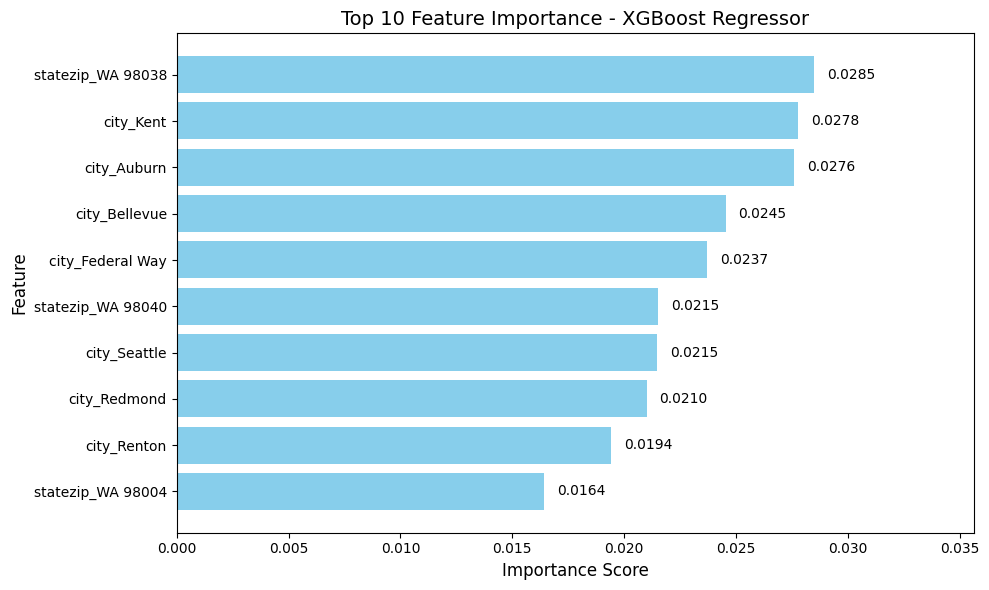

In [ ]:
# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(top_features['Feature'][::-1], top_features['Importance'][::-1], color='skyblue')
plt.title("Top 10 Feature Importance - XGBoost Regressor", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)

# Dapatkan batas maksimum importance untuk mengatur xlim
max_importance = top_features['Importance'].max()
plt.xlim(0, max_importance * 1.25)  # tambahkan ruang di kanan 25%

# Tambahkan angka di ujung bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + max_importance * 0.02,  # geser sedikit ke kanan
             bar.get_y() + bar.get_height()/2,
             f"{width:.4f}",
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Diketahui  fitur yang paling berpengaruh pada model adalah Statezip dan City, terutama pada statezip_WA 98038 dimana fitur ini memiliki pengaruh paling kuat dengan nilai 0.0285

Statezip_wa 98038 adalah rumah yang ada di kota mapple valley dengan nomer zip code = 98038